# Libraries and Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats

In [ ]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
store = pd.read_csv('store.csv')

<ipython-input-2-d504670ee632>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train.csv')


# Data Inspection & Preprocessing

In [ ]:
print("Train Dataset Info:")
train.info()

print("\n Store Dataset Info:")
store.info()

print("\n Test Dataset Info:")
test.info()

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB

 Store Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType           

In [ ]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9,2008,0,0,0,NaN
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9,2009,0,0,0,NaN
4,5,a,a,29910.0,4,2015,0,0,0,NaN


In [ ]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [ ]:
# Convert data type
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Convert categorical columns to the 'category' dtype
train['StateHoliday'] = train['StateHoliday'].astype('category')
store['StoreType'] = store['StoreType'].astype('category')
store['Assortment'] = store['Assortment'].astype('category')
store['PromoInterval'] = store['PromoInterval'].astype('category')
test['StateHoliday'] = test['StateHoliday'].astype('category')

# Convert any columns with float values that should be integers
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(0).astype(int)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(0).astype(int)
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0).astype(int)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0).astype(int)
test['Open'] = test['Open'].fillna(1).astype(int)

In [ ]:
# Check the updated data types
print("\nUpdated Train Dataset Data Types:")
print(train.dtypes)

print("\nUpdated Store Dataset Data Types:")
print(store.dtypes)

print("\nUpdated Test Dataset Data Types:")
print(test.dtypes)


Updated Train Dataset Data Types:
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday           category
SchoolHoliday             int64
dtype: object

Updated Store Dataset Data Types:
Store                           int64
StoreType                    category
Assortment                   category
CompetitionDistance           float64
CompetitionOpenSinceMonth       int64
CompetitionOpenSinceYear        int64
Promo2                          int64
Promo2SinceWeek                 int64
Promo2SinceYear                 int64
PromoInterval                category
dtype: object

Updated Test Dataset Data Types:
Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                      int64
Promo                     int64
StateHol

In [ ]:
# Merge train and test datasets with the store dataset

train = pd.merge(train, store, how='left', on='Store')
test = pd.merge(test, store, how='left', on='Store')

## Missing Values

In [ ]:
# Checking for missing values after merging
print("\nMissing Values in Merged Train Dataset:")
print(train.isnull().sum())
print("\nMissing Values in Merged Test Dataset:")
print(test.isnull().sum())


Missing Values in Merged Train Dataset:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                508031
dtype: int64

Missing Values in Merged Test Dataset:
Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday

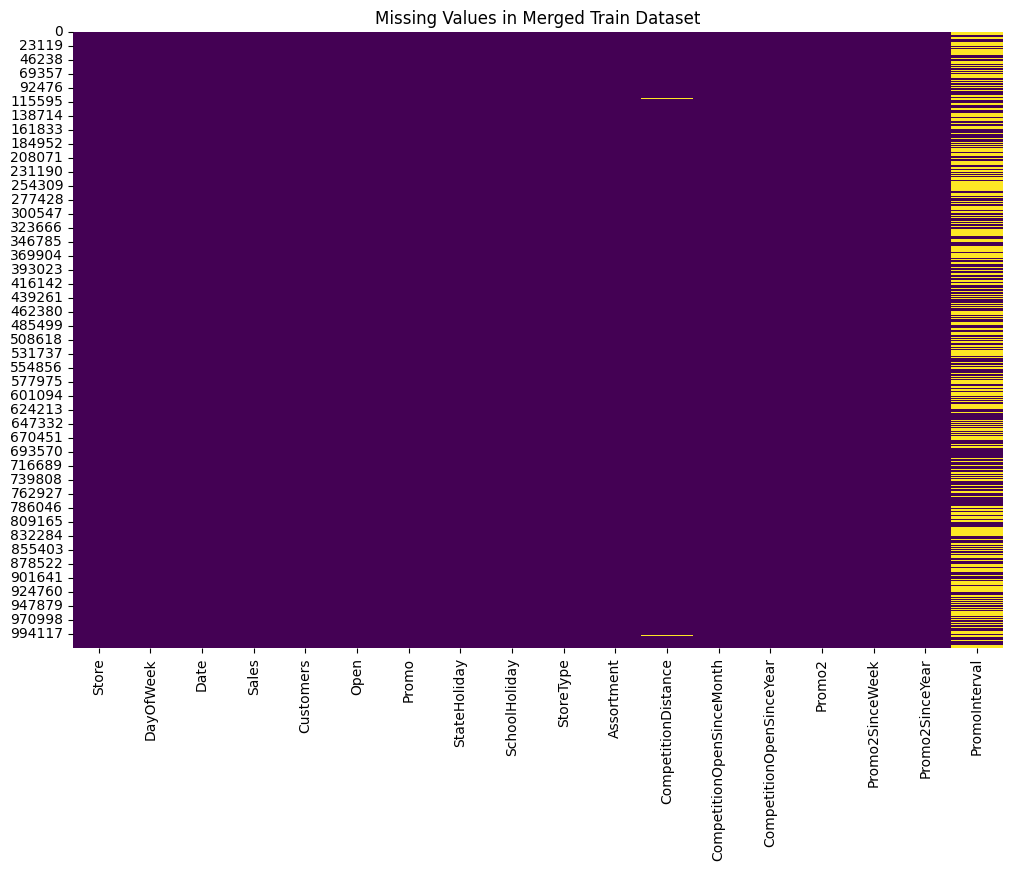

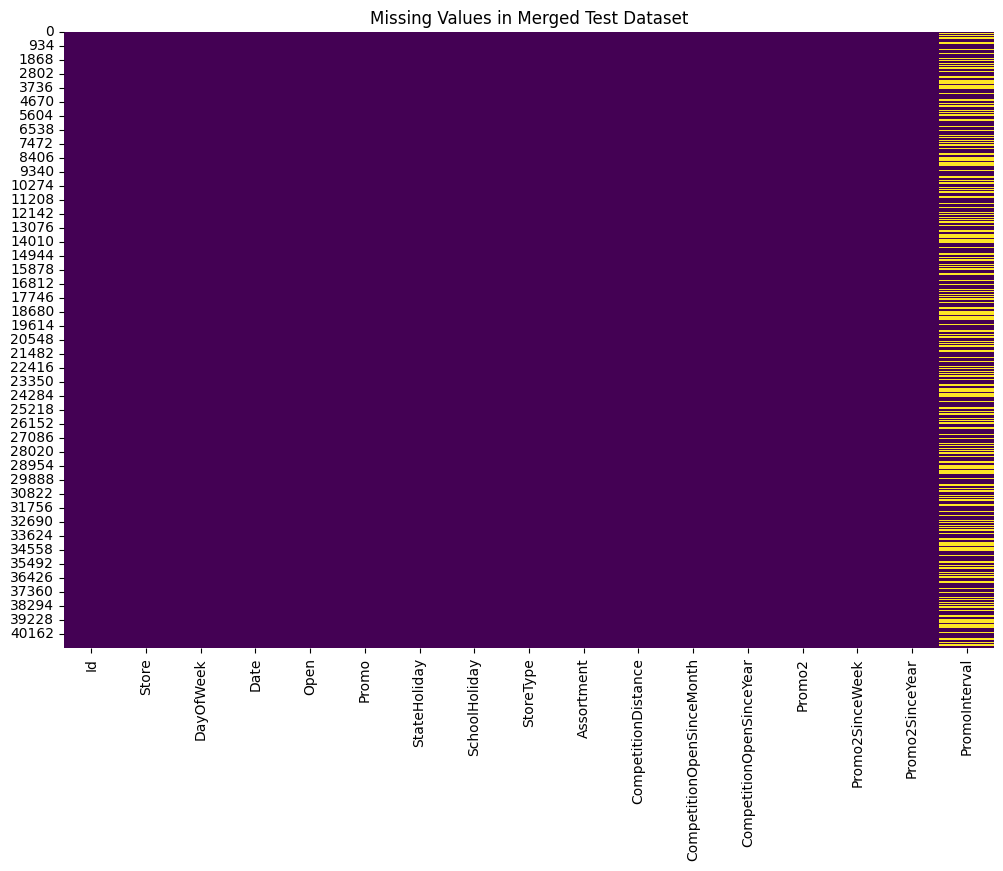

In [ ]:
# Visualizing missing values in the merged train dataset
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values in Merged Train Dataset')
plt.show()

# Visualizing missing values in the merged test dataset
plt.figure(figsize=(12, 8))
sns.heatmap(test.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values in Merged Test Dataset')
plt.show()


In [ ]:
# Define the threshold for missing values (50%)
threshold = 0.5

# Calculate the percentage of missing values in each column after merging
missing_percent_train = train.isnull().mean()
missing_percent_test = test.isnull().mean()

# Identify columns with more than 50% missing values
cols_to_drop_train = missing_percent_train[missing_percent_train > threshold].index
cols_to_drop_test = missing_percent_test[missing_percent_test > threshold].index

# Drop columns with more than 50% missing values
train.drop(cols_to_drop_train, axis=1, inplace=True)
test.drop(cols_to_drop_test, axis=1, inplace=True)

# Output the result
print(f"Dropped columns from train dataset: {list(cols_to_drop_train)}")
print(f"Dropped columns from test dataset: {list(cols_to_drop_test)}")

Dropped columns from train dataset: []
Dropped columns from test dataset: []


## Outliers

In [ ]:
# Define a function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
    outliers = (z_scores > threshold).sum(axis=0)
    return outliers

# Apply the function to the merged train dataset
outliers_train = detect_outliers_zscore(train)
print("Outliers detected in Merged Train Dataset:")
print(outliers_train)

outliers_test = detect_outliers_zscore(test)
print("\n Outliers detected in Merged Test Dataset:")
print(outliers_test)

Outliers detected in Merged Train Dataset:
Store                            0
DayOfWeek                        0
Sales                         9731
Customers                    14148
Open                             0
Promo                            0
SchoolHoliday                    0
CompetitionDistance              0
CompetitionOpenSinceMonth        0
CompetitionOpenSinceYear         0
Promo2                           0
Promo2SinceWeek                  0
Promo2SinceYear                  0
dtype: int64

 Outliers detected in Merged Test Dataset:
Id                           0
Store                        0
DayOfWeek                    0
Open                         0
Promo                        0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64


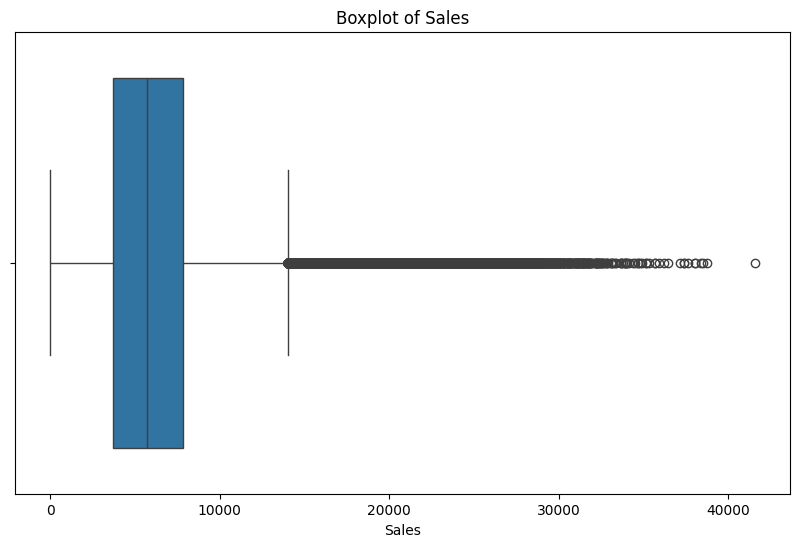

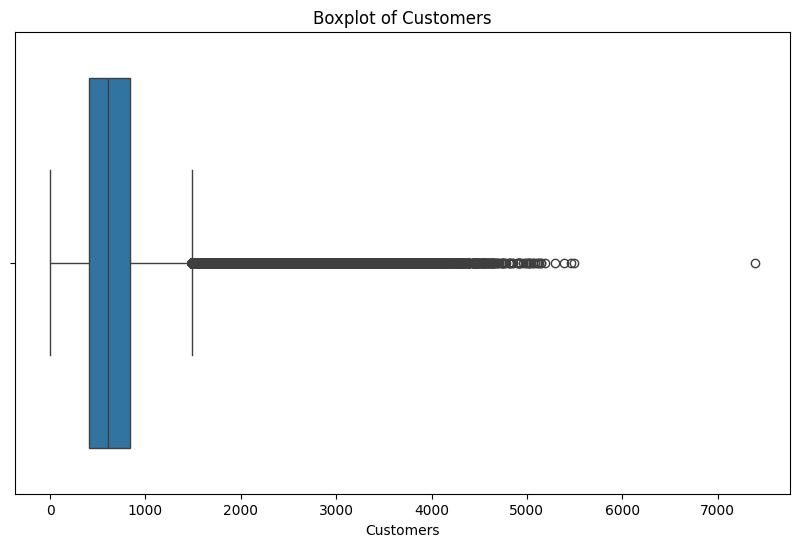

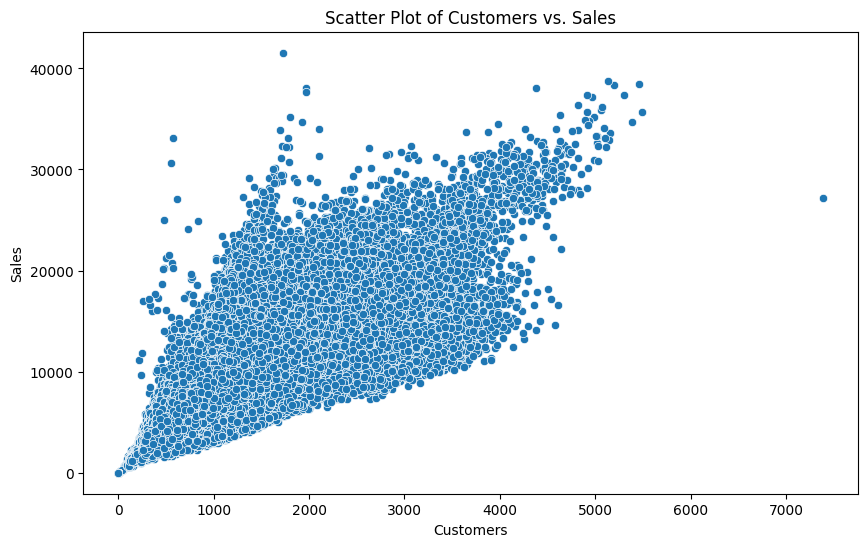

In [ ]:
# Visualizing outliers in the 'Sales' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['Sales'])
plt.title('Boxplot of Sales')
plt.show()

# Visualizing outliers in the 'Customers' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['Customers'])
plt.title('Boxplot of Customers')
plt.show()

# Scatter plot for Sales vs. Customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['Customers'], y=train['Sales'])
plt.title('Scatter Plot of Customers vs. Sales')
plt.show()


In [ ]:
# Capping the 'Sales' outliers
upper_limit_sales = train['Sales'].quantile(0.95)
train['Sales'] = np.where(train['Sales'] > upper_limit_sales, upper_limit_sales, train['Sales'])

# Capping the 'Customers' outliers
upper_limit_customers = train['Customers'].quantile(0.95)
train['Customers'] = np.where(train['Customers'] > upper_limit_customers, upper_limit_customers, train['Customers'])

print("Data after capping outliers:")
outliers_train = detect_outliers_zscore(train)
print("Outliers detected in Merged Train Dataset after capping:")
print(outliers_train)

Data after capping outliers:
Outliers detected in Merged Train Dataset after capping:
Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
SchoolHoliday                0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64


## Inconsistent Value

In [ ]:
# Checking for unexpected categorical values in the 'StateHoliday' column
expected_categories = ['0', 'a', 'b', 'c']
incomplete_holidays = train[~train['StateHoliday'].isin(expected_categories)]
print("Rows with incomplete StateHoliday data (unexpected values):")
print(incomplete_holidays)


Rows with incomplete StateHoliday data (unexpected values):
        Store  DayOfWeek       Date    Sales  Customers  Open  Promo  \
327680    730          4 2014-09-25   5732.0      722.0     1      0   
327681    731          4 2014-09-25   7470.0      802.0     1      0   
327682    732          4 2014-09-25   5484.0      730.0     1      0   
327683    733          4 2014-09-25  12137.0     1362.0     1      0   
327684    734          4 2014-09-25   3519.0      404.0     1      0   
...       ...        ...        ...      ...        ...   ...    ...   
589819    770          7 2014-01-19      0.0        0.0     0      0   
589820    771          7 2014-01-19      0.0        0.0     0      0   
589821    772          7 2014-01-19      0.0        0.0     0      0   
589822    773          7 2014-01-19      0.0        0.0     0      0   
589823    774          7 2014-01-19      0.0        0.0     0      0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistanc

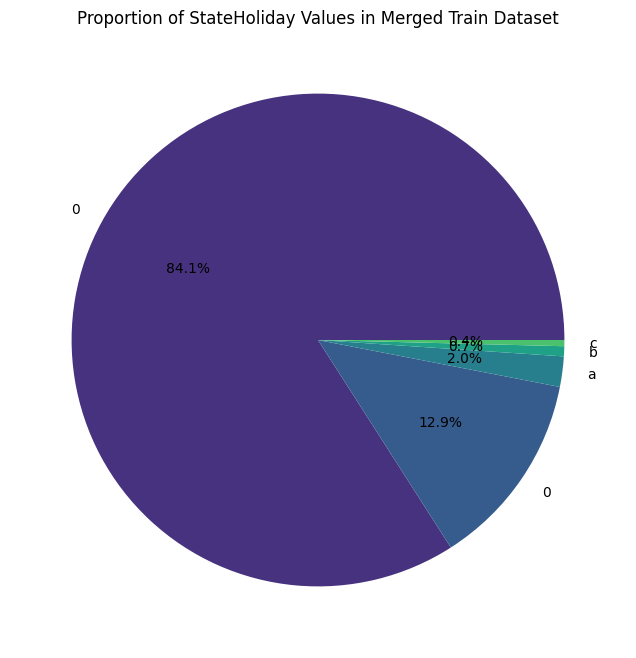

In [ ]:
# Plot the distribution as a pie chart
plt.figure(figsize=(8, 8))
train['StateHoliday'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Proportion of StateHoliday Values in Merged Train Dataset')
plt.ylabel('')
plt.show()

# Feature Engineering


## Time-based Features

In [1]:
# Extracting date-based features
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['WeekOfYear'] = train['Date'].dt.isocalendar().week
train['DayOfWeek'] = train['Date'].dt.dayofweek
train['IsWeekend'] = train['DayOfWeek'].isin([5, 6]).astype(int)  # 5 = Saturday, 6 = Sunday

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
test['WeekOfYear'] = test['Date'].dt.isocalendar().week
test['DayOfWeek'] = test['Date'].dt.dayofweek
test['IsWeekend'] = test['DayOfWeek'].isin([5, 6]).astype(int)

NameError: name 'train' is not defined

## Lag Features

In [2]:
# Creating lag features for sales (e.g., sales from the previous week, previous month)
train['Sales_lag_1'] = train.groupby('Store')['Sales'].shift(1)
train['Sales_lag_7'] = train.groupby('Store')['Sales'].shift(7)
train['Sales_lag_30'] = train.groupby('Store')['Sales'].shift(30)

# Fill NaNs in lag features with median sales value
train['Sales_lag_1'].fillna(train['Sales'].median(), inplace=True)
train['Sales_lag_7'].fillna(train['Sales'].median(), inplace=True)
train['Sales_lag_30'].fillna(train['Sales'].median(), inplace=True)

NameError: name 'train' is not defined

## Promotion

In [ ]:
# Promo interaction features
train['Promo2Since'] = train['Promo2SinceYear'] + train['Promo2SinceWeek'] / 52.0
train['CompetitionSince'] = train['CompetitionOpenSinceYear'] + train['CompetitionOpenSinceMonth'] / 12.0
train['Promo2Duration'] = train['Year'] + train['WeekOfYear'] / 52.0 - train['Promo2Since']
train['CompetitionDuration'] = train['Year'] + train['Month'] / 12.0 - train['CompetitionSince']

test['Promo2Since'] = test['Promo2SinceYear'] + test['Promo2SinceWeek'] / 52.0
test['CompetitionSince'] = test['CompetitionOpenSinceYear'] + test['CompetitionOpenSinceMonth'] / 12.0
test['Promo2Duration'] = test['Year'] + test['WeekOfYear'] / 52.0 - test['Promo2Since']
test['CompetitionDuration'] = test['Year'] + test['Month'] / 12.0 - test['CompetitionSince']


## Holiday

In [ ]:
# Flag special days (holidays, events)
train['IsHoliday'] = train['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
train['IsSchoolHoliday'] = train['SchoolHoliday']

test['IsHoliday'] = test['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
test['IsSchoolHoliday'] = test['SchoolHoliday']


# Modeling

In [ ]:
# Apply one-hot encoding to categorical variables
train_encoded = pd.get_dummies(train, columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])
test_encoded = pd.get_dummies(test, columns=['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'])

# Ensure the train and test datasets have the same columns after encoding
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)


In [ ]:
# Prepare the data (exclude any columns that won't be used in modeling)
X = train_encoded.drop(['Sales', 'Date'], axis=1)  # Drop 'Sales' and 'Date' from training features
y = train_encoded['Sales']  # Target variable

# Prepare the test set by dropping 'Sales' (if it exists) and 'Date'
X_test = test_encoded.drop(columns=['Sales', 'Date'], errors='ignore')  # Drop 'Sales' and 'Date' from test features

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Impute missing values in X_train, X_val, and X_test
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)


## Linear Regression

In [ ]:
print("\n === Linear Regression ===")
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_val)

# Evaluate the model
lr_rmse = np.sqrt(mean_squared_error(y_val, y_pred_lr))
lr_mae = mean_absolute_error(y_val, y_pred_lr)

print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression MAE: {lr_mae}")


 === Linear Regression ===
Linear Regression RMSE: 936.2093034079058
Linear Regression MAE: 717.346021401655


## Polynomial Regression

In [ ]:
print("\n === Polynomial Regression ===")
# Transform features to polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Apply Linear Regression to Polynomial Features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = lr_poly.predict(X_val_poly)

# Evaluate the model
poly_rmse = np.sqrt(mean_squared_error(y_val, y_pred_poly))
poly_mae = mean_absolute_error(y_val, y_pred_poly)

print(f"Polynomial Regression RMSE: {poly_rmse}")
print(f"Polynomial Regression MAE: {poly_mae}")


 === Polynomial Regression ===
Polynomial Regression RMSE: 707.9501060370105
Polynomial Regression MAE: 524.43733763301


## Random Forest

In [ ]:
print("\n === Random Forest Regression ===")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_val)

# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf))
rf_mae = mean_absolute_error(y_val, y_pred_rf)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")



 === Random Forest Regression ===
Random Forest RMSE: 470.81055085099734
Random Forest MAE: 304.1190084151749


## Model Comparison

In [ ]:
print("\n === Model Comparison ===")
models = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression", "Random Forest"],
    "RMSE": [lr_rmse, poly_rmse, rf_rmse],
    "MAE": [lr_mae, poly_mae, rf_mae]
})

print(models)


 === Model Comparison ===
                   Model        RMSE         MAE
0      Linear Regression  936.209303  717.346021
1  Polynomial Regression  707.950106  524.437338
2          Random Forest  470.810551  304.119008


<ipython-input-48-ab3a4e40758a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=models, palette="viridis")
<ipython-input-48-ab3a4e40758a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=models, palette="magma")


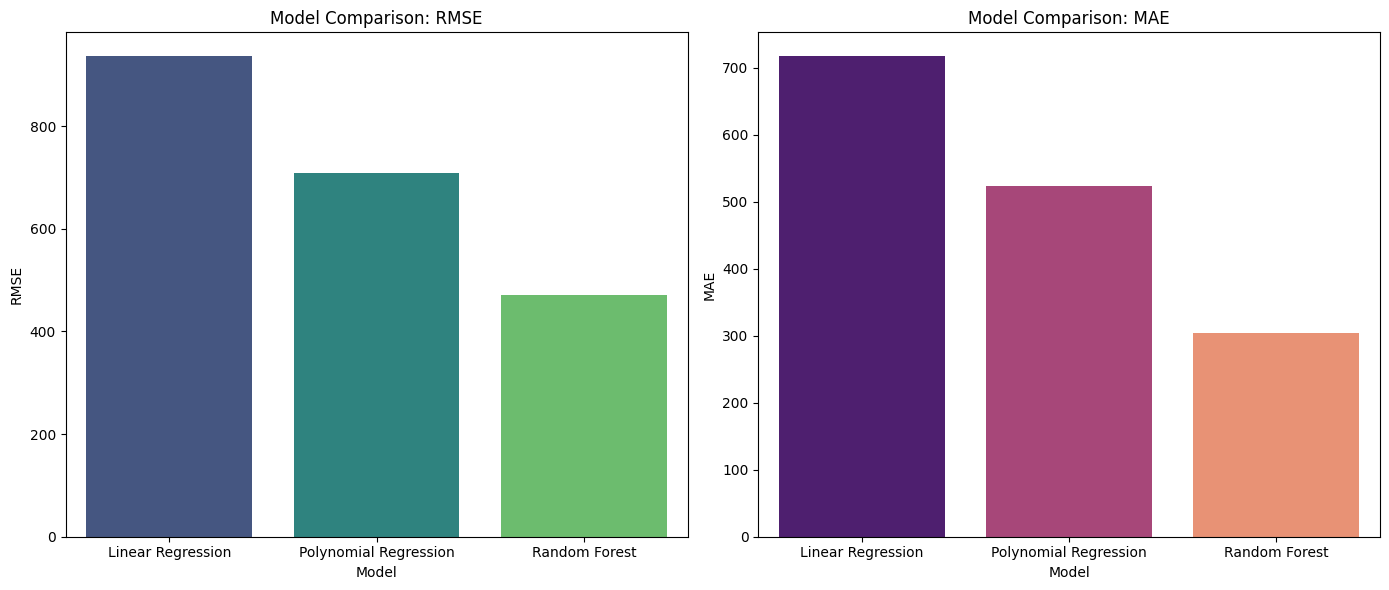

In [ ]:
plt.figure(figsize=(14, 6))

# RMSE Comparison
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='RMSE', data=models, palette="viridis")
plt.title('Model Comparison: RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')

# MAE Comparison
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='MAE', data=models, palette="magma")
plt.title('Model Comparison: MAE')
plt.ylabel('MAE')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

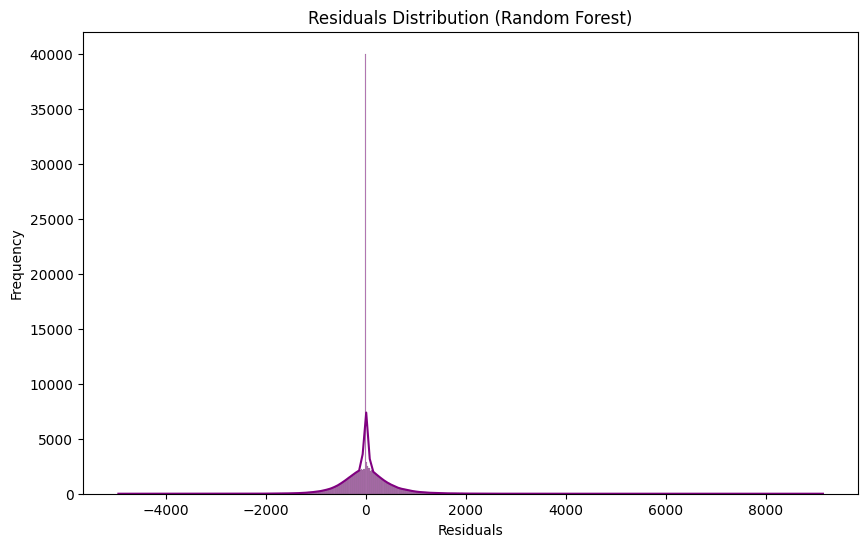

In [ ]:
residuals_rf = y_val - y_pred_rf

plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True, color='purple')
plt.title('Residuals Distribution (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

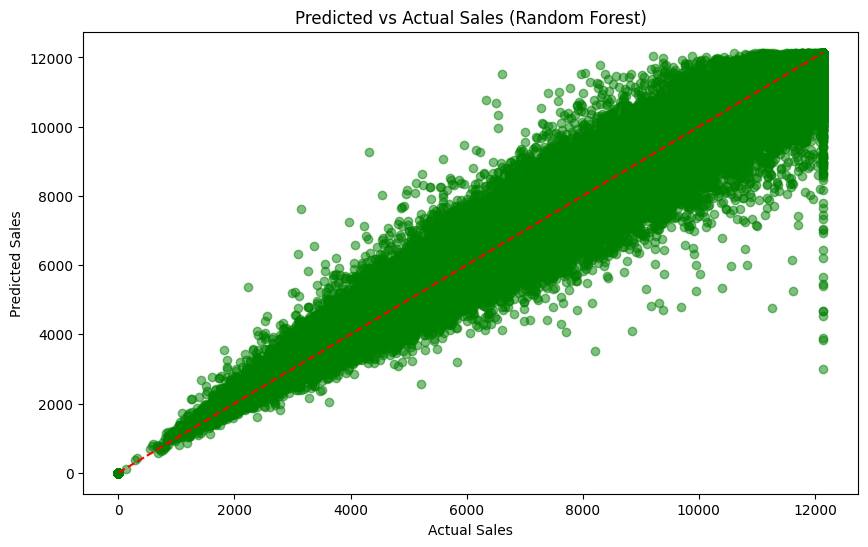

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.title('Predicted vs Actual Sales (Random Forest)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


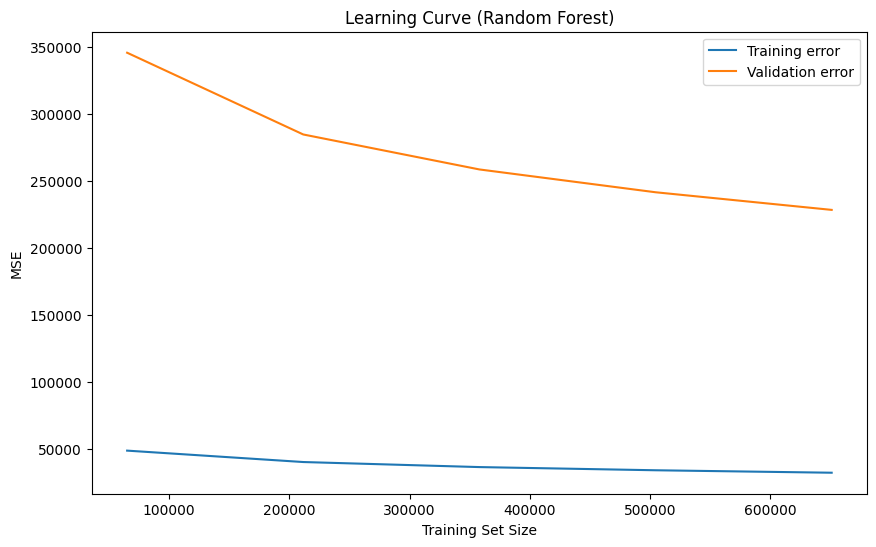

In [ ]:
# Leaning curve
train_sizes, train_scores, val_scores = learning_curve(RandomForestRegressor(), X_train, y_train, cv=5,
                                                       scoring='neg_mean_squared_error', n_jobs=-1,
                                                       train_sizes=np.linspace(0.1, 1.0, 5))
train_scores_mean = -train_scores.mean(axis=1)
val_scores_mean = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, val_scores_mean, label='Validation error')
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()
